<h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις τεχνικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες επιπρόσθετες, με στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [1]:
%matplotlib inline

import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων και της πολυπλοκότητας ανάλυσης που ανακύπτει. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Ο βαθμός κάθε κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Ο συντελεστής ομαδοποίησης κάθε κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Την ενδιαμεσική εγώκεντρικότητα κάθε κόμβου και τη μέση ενδιαμεσική εγωκεντρικότητα.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>
<p style=text-align:justify><b>Προσοχή!</b> Θα πρέπει να ελέγξετε αν οι γράφοι είναι κατευθυνόμενοι, δηλ. οι αντίστοιχοι πίνακες γειτνίασης είναι μη συμμετρικοί. Στην περίπτωση αυτή, θα πρέπει να τους μετατρέψετε σε μη-κατευθυνόμενους με τουλάχιστον το ίδιο πλήθος συνδέσεων, <b>προτού</b> εφαρμόσετε τους αλγόριθμους εντοπισμού κοινοτήτων του <b>πίνακα 2</b>. </p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες από την ιστοσελίδα <a style=text-decoration:none href="http://www-personal.umich.edu/~mejn/netdata/">http://www-personal.umich.edu/~mejn/netdata/</a> </caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>
<tr>
    <td style=text-align:left>Les Miserables</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/lesmis.zip'>lesmis.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>lesmis.gml</b> contains the weighted network of coappearances of
characters in Victor Hugo's novel "Les Miserables".  Nodes represent characters as indicated by the labels and edges connect any pair of characters that appear in the same chapter of the book.  The values on the edges are the number of such coappearances.  The data on coappearances were taken from D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993)</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Dolphin social network</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/dolphins.zip'>dolphins.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>dolphins.gml</b> contains an undirected social network of frequent associations between 62 dolphins in a community living off Doubtful Sound, New Zealand, as compiled by Lusseau et al. (2003)</p>
    </td>
</tr> 
</table>

<h4>1. Παραγωγή συνθετικών τοπολογιών</h4> 

In [2]:
n=150
d=4
M=750
R=0.15
p=0.3
k=4

REG = nx.watts_strogatz_graph(n,d,0)
RGER = nx.gnm_random_graph(n,M)

#we need to ensure connectivity for spectral clustering to work
RGG = nx.random_geometric_graph(n,R)
while nx.is_connected(RGG)==False:
    RGG = nx.random_geometric_graph(n,R)
    
SF = nx.barabasi_albert_graph(n,d)
SW = nx.watts_strogatz_graph(n,k,p)

<h4>2. Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

In [3]:
football = nx.read_gml("football.gml")

In [4]:
adj = nx.adjacency_matrix(football)
def check_symmetric(a, tol=1e-8):
    return np.allclose(a, a.T, atol=tol)
print (check_symmetric(adj.todense()))

True


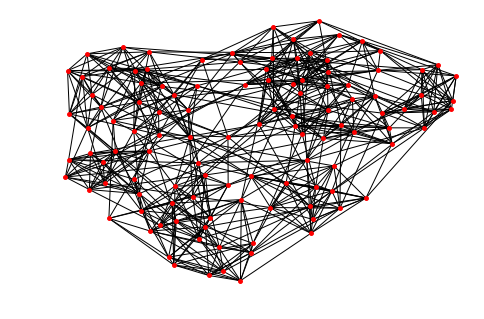

In [9]:
nx.draw(football,node_size=15)

In [10]:
lesmis = nx.read_gml("lesmis.gml")

In [11]:
adj = nx.adjacency_matrix(lesmis)
def check_symmetric(a, tol=1e-8):
    return np.allclose(a, a.T, atol=tol)
print (check_symmetric(adj.todense()))

True


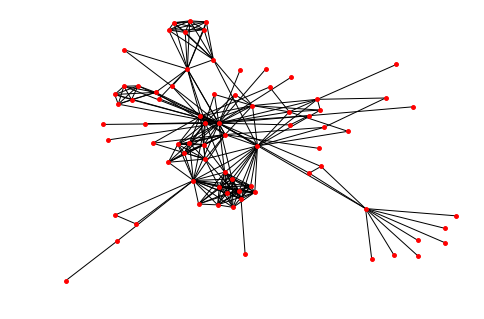

In [12]:
nx.draw(lesmis,node_size=15)

In [13]:
dolphins = nx.read_gml("dolphins.gml")

In [14]:
adj = nx.adjacency_matrix(dolphins)
def check_symmetric(a, tol=1e-8):
    return np.allclose(a, a.T, atol=tol)
print (check_symmetric(adj.todense()))

True


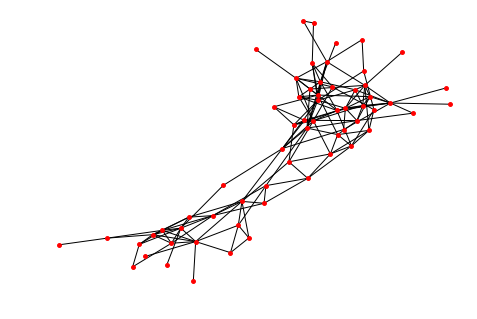

In [15]:
nx.draw(dolphins,node_size=15)

In [16]:
#convert nodes' labels from strings to integers in real topologies
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

nfootball,football_map=conv2int(football,0)
nlesmis, lesmis_map=conv2int(lesmis,0)
ndolphins, dolphins_map=conv2int(dolphins,0)

#G=nx.relabel_nodes(nG,G_mapping)

<h4>3. Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

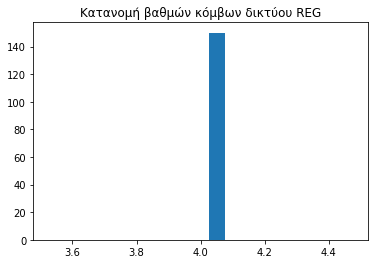

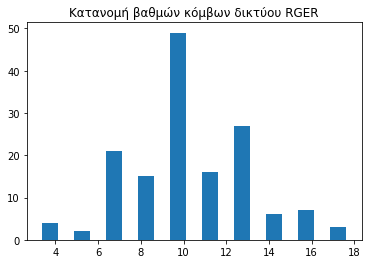

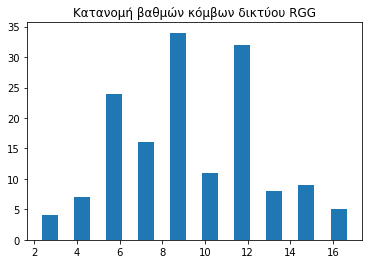

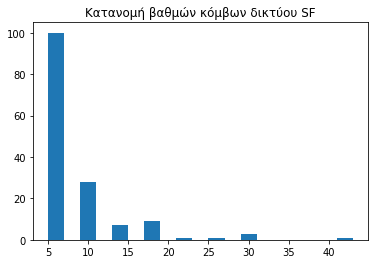

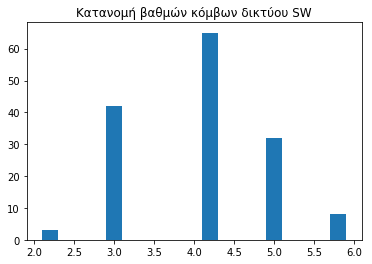

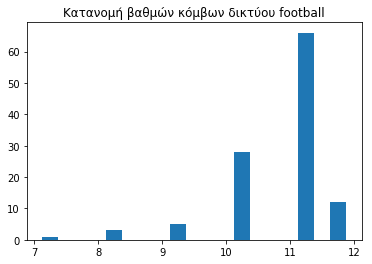

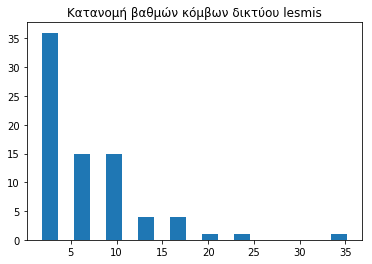

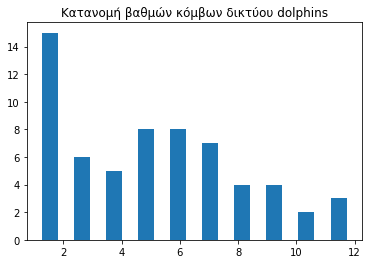

Mean degree REG: 4.000000
Mean degree RGER: 10.000000
Mean degree RGG: 9.066667
Mean degree SW: 4.000000
Mean degree SF: 7.786667
Mean degree football: 10.660870
Mean degree lesmis: 6.597403
Mean degree dolphins: 5.129032


In [17]:
def find_degree(G):
    return [x[1] for x in G.degree()]

REG_degree = find_degree(REG)
RGER_degree = find_degree(RGER)
RGG_degree = find_degree(RGG)
SF_degree = find_degree(SF)
SW_degree = find_degree(SW)
football_degree = find_degree(nfootball)
lesmis_degree = find_degree(nlesmis)
dolphins_degree = find_degree(ndolphins)

def degree_hist(G_degree,name):
    plt.figure()
    plt.title("Κατανομή βαθμών κόμβων δικτύου "+name)
    REG_degree_dist = plt.hist(G_degree, rwidth=0.5)
    plt.show()

degree_hist(REG_degree,"REG")
degree_hist(RGER_degree,"RGER")
degree_hist(RGG_degree,"RGG")
degree_hist(SF_degree,"SF")
degree_hist(SW_degree,"SW")
degree_hist(football_degree,"football")
degree_hist(lesmis_degree,"lesmis")
degree_hist(dolphins_degree,"dolphins")

mean_degree_REG = np.mean(REG_degree)
mean_degree_RGER = np.mean(RGER_degree)
mean_degree_RGG = np.mean(RGG_degree)
mean_degree_SW = np.mean(SW_degree)
mean_degree_SF = np.mean(SF_degree)
mean_degree_football = np.mean(football_degree)
mean_degree_lesmis = np.mean(lesmis_degree)
mean_degree_dolphins = np.mean(dolphins_degree)

print("Mean degree REG: %f" %mean_degree_REG)
print("Mean degree RGER: %f" %mean_degree_RGER)
print("Mean degree RGG: %f" %mean_degree_RGG)
print("Mean degree SW: %f" %mean_degree_SW)
print("Mean degree SF: %f" %mean_degree_SF)
print("Mean degree football: %f" %mean_degree_football)
print("Mean degree lesmis: %f" %mean_degree_lesmis)
print("Mean degree dolphins: %f" %mean_degree_dolphins)

#### Σχολιασμός

Το δίκτυο American College Football θυμίζει small world, εφόσον οι περισσότεροι κόμβοι έχουν βαθμό 11, με μικρές εξαιρέσεις. Οι υπόλοιπες τοπολογίες θυμίζουν scale free, διότι υπάρχουν βασικοί κόμβοι με μεγάλο βαθμό, και οι υπόλοιποι είναι μικρού βαθμόυ.

<h4>4. Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

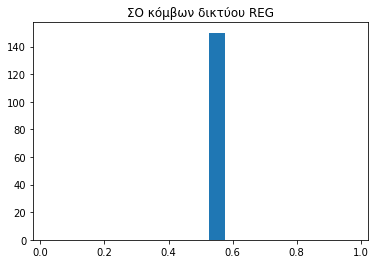

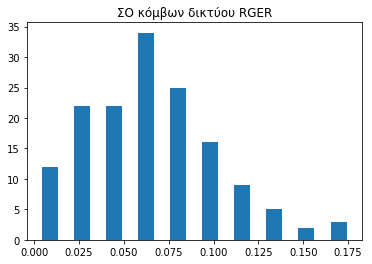

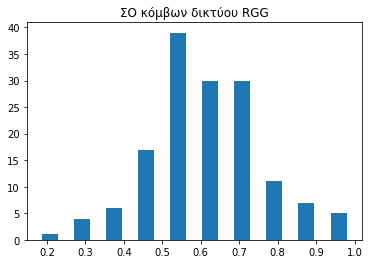

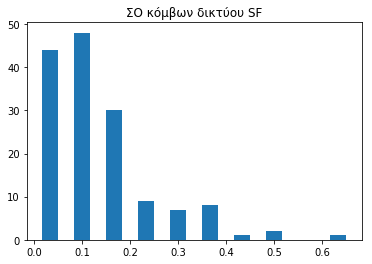

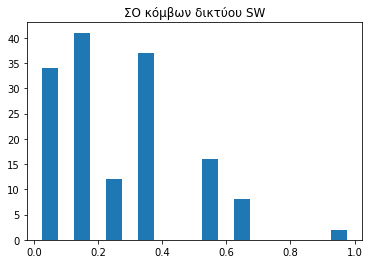

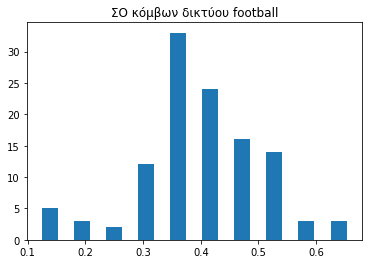

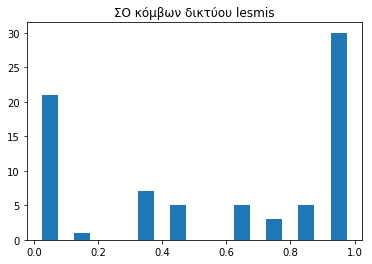

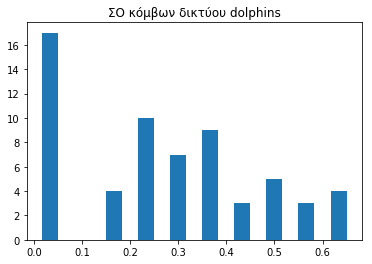

Mean cc REG: 0.500000
Mean cc RGER: 0.064189
Mean cc RGG: 0.608750
Mean cc SW: 0.240889
Mean cc SF: 0.122504
Mean cc football: 0.403216
Mean cc lesmis: 0.573137
Mean cc dolphins: 0.258958


In [18]:
def clust_coef(G):
    return nx.clustering(G)

REG_cc = clust_coef(REG)
RGER_cc = clust_coef(RGER)
RGG_cc = clust_coef(RGG)
SF_cc = clust_coef(SF)
SW_cc = clust_coef(SW)
football_cc = clust_coef(nfootball)
lesmis_cc = clust_coef(nlesmis)
dolphins_cc = clust_coef(ndolphins)

def cc_hist(G_cc,name):
    plt.figure()
    plt.title("ΣΟ κόμβων δικτύου "+name)
    REG_degree_dist = plt.hist(list(G_cc.values()), rwidth=0.5)
    plt.show()

cc_hist(REG_cc,"REG")
cc_hist(RGER_cc,"RGER")
cc_hist(RGG_cc,"RGG")
cc_hist(SF_cc,"SF")
cc_hist(SW_cc,"SW")
cc_hist(football_cc,"football")
cc_hist(lesmis_cc,"lesmis")
cc_hist(dolphins_cc,"dolphins")

mean_cc_REG = np.mean(list(REG_cc.values()))
mean_cc_RGER = np.mean(list(RGER_cc.values()))
mean_cc_RGG = np.mean(list(RGG_cc.values()))
mean_cc_SW = np.mean(list(SW_cc.values()))
mean_cc_SF = np.mean(list(SF_cc.values()))
mean_cc_football = np.mean(list(football_cc.values()))
mean_cc_lesmis = np.mean(list(lesmis_cc.values()))
mean_cc_dolphins = np.mean(list(dolphins_cc.values()))

print("Mean cc REG: %f" %mean_cc_REG)
print("Mean cc RGER: %f" %mean_cc_RGER)
print("Mean cc RGG: %f" %mean_cc_RGG)
print("Mean cc SW: %f" %mean_cc_SW)
print("Mean cc SF: %f" %mean_cc_SF)
print("Mean cc football: %f" %mean_cc_football)
print("Mean cc lesmis: %f" %mean_cc_lesmis)
print("Mean cc dolphins: %f" %mean_cc_dolphins)

#### Σχολιασμός

Το δίκτυο American College Football μοιάζει με τυχαίο γεωμετρικό γράφο (RGG) εφόσον οι ποδοσφαίρικές ομάδες χωριζονται σε 8 divisions ανάλογα με τη γεωγραφική τους έδρα. Τα άλλα δύο δίκτυα θυμίζουν small world.

<h4>5. Μελέτη ενδιαμεσικής εγω-κεντρικότητας για πραγματικές και συνθετικές τοπολογίες </h4>

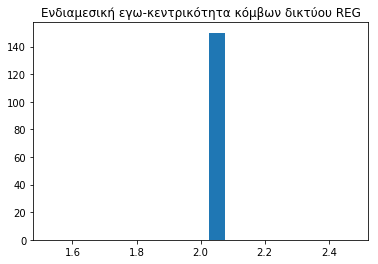

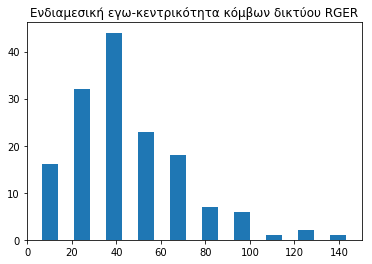

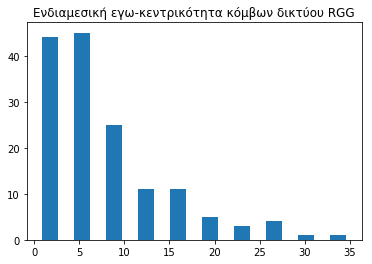

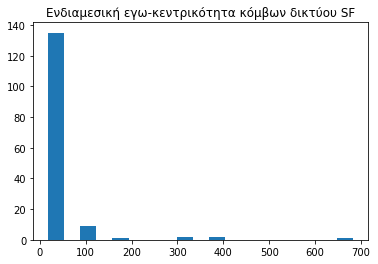

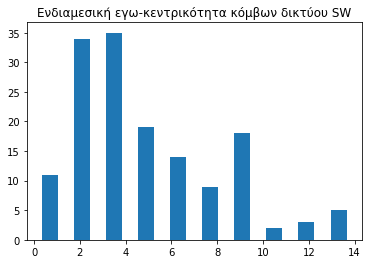

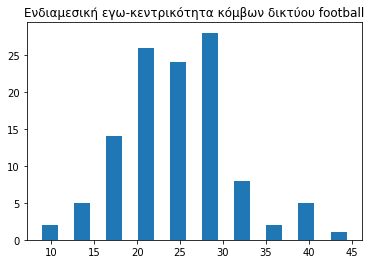

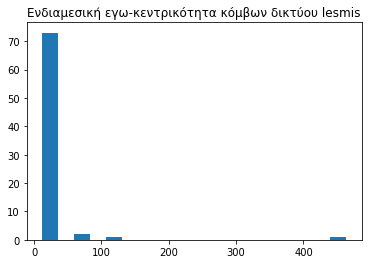

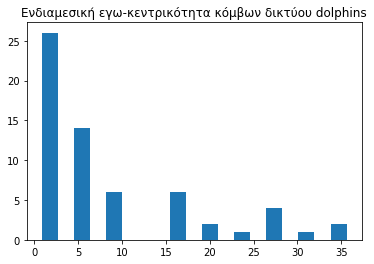

Mean ego betweenness REG: 2.000000
Mean ego betweenness RGER: 45.195556
Mean ego betweenness RGG: 7.649317
Mean ego betweenness SW: 36.388444
Mean ego betweenness SF: 4.833333
Mean ego betweenness football: 24.722133
Mean ego betweenness lesmis: 13.318460
Mean ego betweenness dolphins: 8.517473


In [19]:
def ego_centrality(G):
    ego_centralities = []
    for i in range (G.number_of_nodes()):
        ego = nx.ego_graph(G,i)
        adj_ego = nx.adjacency_matrix(ego)
        adj_ego = adj_ego.todense()
        adj_ego = np.multiply(np.linalg.matrix_power(adj_ego,2),np.ones(adj_ego.shape)-adj_ego)
        adj_ego = np.triu(adj_ego,1)
        adj_ego = np.reciprocal(adj_ego, where = (adj_ego != 0))[np.nonzero(adj_ego)].sum()
        ego_centralities.append(adj_ego)
    return ego_centralities

REG_ebtw = ego_centrality(REG)
RGER_ebtw = ego_centrality(RGER)
RGG_ebtw = ego_centrality(RGG)
SF_ebtw = ego_centrality(SF)
SW_ebtw = ego_centrality(SW)
football_ebtw = ego_centrality(nfootball)
lesmis_ebtw = ego_centrality(nlesmis)
dolphins_ebtw = ego_centrality(ndolphins)

def egobtw_hist(G_ebtw,name): 
    plt.figure()
    plt.title("Ενδιαμεσική εγω-κεντρικότητα κόμβων δικτύου "+name)
    REG_degree_dist = plt.hist(G_ebtw, rwidth=0.5)
    plt.show()

egobtw_hist(REG_ebtw,"REG")
egobtw_hist(RGER_ebtw,"RGER")
egobtw_hist(RGG_ebtw,"RGG")
egobtw_hist(SF_ebtw,"SF")
egobtw_hist(SW_ebtw,"SW")
egobtw_hist(football_ebtw,"football")
egobtw_hist(lesmis_ebtw,"lesmis")
egobtw_hist(dolphins_ebtw,"dolphins")
    
mean_ebtw_REG = np.mean(REG_ebtw)
mean_ebtw_RGER = np.mean(RGER_ebtw)
mean_ebtw_RGG = np.mean(RGG_ebtw)
mean_ebtw_SW = np.mean(SF_ebtw)
mean_ebtw_SF = np.mean(SW_ebtw)
mean_ebtw_football = np.mean(football_ebtw)
mean_ebtw_lesmis = np.mean(lesmis_ebtw)
mean_ebtw_dolphins = np.mean(dolphins_ebtw)

print("Mean ego betweenness REG: %f" %mean_ebtw_REG)
print("Mean ego betweenness RGER: %f" %mean_ebtw_RGER)
print("Mean ego betweenness RGG: %f" %mean_ebtw_RGG)
print("Mean ego betweenness SW: %f" %mean_ebtw_SW)
print("Mean ego betweenness SF: %f" %mean_ebtw_SF)
print("Mean ego betweenness football: %f" %mean_ebtw_football)
print("Mean ego betweenness lesmis: %f" %mean_ebtw_lesmis)
print("Mean ego betweenness dolphins: %f" %mean_ebtw_dolphins)

#### Σχολιασμός

Τα τρία δίκτυα βλέπουμε ότι μοιάζουν με τα πρότυπα δίκτυα ακριβώς όπως στην κατανομή βαθμού κόμβων, δηλαδή το δίκτυο American College Football μοιάζει με small world, και τα άλλα δύο με scale free.

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<p>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<p>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία υπολογίστε το modularity χρησιμοποιώντας τη συνάρτηση <a style=text-decoration:none href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.quality.performance.html#networkx.algorithms.community.quality.performance'>performance</a>.</p>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

<h4>1. Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [20]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

<h4>2. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>

In [21]:
#girvan_newman:partitions of at most k=50 communities, select the one with the highest value of modularity.
#use nx.algorithms.community.centrality.girvan_newman for the communities
#nx.algorithms.community.quality.performance to measure modularity
import itertools as it
def comd_GN(G,k):
    GN = nx.algorithms.community.centrality.girvan_newman(G)
    GN_lim = it.takewhile(lambda c: len(c) <= k, GN)
    max_mod = -1
    for communities in GN_lim:
        if nx.algorithms.community.quality.performance(G,tuple(sorted(c) for c in communities)) > max_mod:
            max_mod = nx.algorithms.community.quality.performance(G,[sorted(c) for c in communities])
            max_mod_com = communities
    return [list(com) for com in max_mod_com]

REG_GN = comd_GN(REG,50)
RGER_GN = comd_GN(RGER,50)
RGG_GN = comd_GN(RGG,50)
SW_GN = comd_GN(SW,50)
SF_GN = comd_GN(SF,50)
football_GN = comd_GN(nfootball,50)
lesmis_GN = comd_GN(nlesmis,50)
dolphins_GN = comd_GN(ndolphins,50)

REG_GN_modularity = nx.algorithms.community.quality.performance(REG,REG_GN)
RGER_GN_modularity = nx.algorithms.community.quality.performance(RGER,RGER_GN)
RGG_GN_modularity = nx.algorithms.community.quality.performance(RGG,RGG_GN)
SW_GN_modularity = nx.algorithms.community.quality.performance(SW,SW_GN)
SF_GN_modularity = nx.algorithms.community.quality.performance(SF,SF_GN)
football_GN_modularity = nx.algorithms.community.quality.performance(nfootball,football_GN)
lesmis_GN_modularity = nx.algorithms.community.quality.performance(nlesmis,lesmis_GN)
dolphins_GN_modularity = nx.algorithms.community.quality.performance(ndolphins,dolphins_GN)

<h4>3. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering.</h4>

In [65]:
##### Spectral Clustering:all partitions of k={1,..50} communities
#use SpectralClustering for the communities
#nx.algorithms.community.quality.performance to measure modularity

def comd_SC(G,k):
    adj_mat = nx.to_numpy_matrix(G)
    max_mod = -1
    for i in range(1,k+1):
        sc = SpectralClustering(i,affinity='precomputed')
        sc.fit(adj_mat)
        unq, unq_inv, unq_cnt = np.unique(sc.labels_, return_inverse=True, return_counts=True)
        coms = np.split(np.argsort(unq_inv), np.cumsum(unq_cnt[:-1]))
        if nx.algorithms.community.quality.performance(G,coms) > max_mod:
            max_mod = nx.algorithms.community.quality.performance(G,coms)
            max_mod_com = coms
    return [com.tolist() for com in max_mod_com]

REG_SC = comd_SC(REG,50)
RGER_SC = comd_SC(RGER,50)
RGG_SC = comd_SC(RGG,50)
SW_SC = comd_SC(SW,50)
SF_SC = comd_SC(SF,50)
football_SC = comd_SC(nfootball,50)
lesmis_SC = comd_SC(nlesmis,50)
dolphins_SC = comd_SC(ndolphins,50)

REG_SC_modularity = nx.algorithms.community.quality.performance(REG,REG_SC)
RGER_SC_modularity = nx.algorithms.community.quality.performance(RGER,RGER_SC)
RGG_SC_modularity = nx.algorithms.community.quality.performance(RGG,RGG_SC)
SW_SC_modularity = nx.algorithms.community.quality.performance(SW,SW_SC)
SF_SC_modularity = nx.algorithms.community.quality.performance(SF,SF_SC)
football_SC_modularity = nx.algorithms.community.quality.performance(nfootball,football_SC)
lesmis_SC_modularity = nx.algorithms.community.quality.performance(nlesmis,lesmis_SC)
dolphins_SC_modularity = nx.algorithms.community.quality.performance(ndolphins,dolphins_SC)

<h4>4. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>

In [27]:
#Modularity Maximization
#use nx.algorithms.community.modularity_max.greedy_modularity_communities for the communities
#nx.algorithms.community.quality.performance to measure modularity

def comd_MM(G):
    communities = list(nx.algorithms.community.modularity_max.greedy_modularity_communities(G))
    coms = [sorted(c) for c in communities]
    return coms

REG_MM = comd_MM(REG)
RGER_MM = comd_MM(RGER)
RGG_MM = comd_MM(RGG)
SW_MM = comd_MM(SW)
SF_MM = comd_MM(SF)
football_MM = comd_MM(nfootball)
lesmis_MM = comd_MM(nlesmis)
dolphins_MM = comd_MM(ndolphins)

REG_MM_modularity = nx.algorithms.community.quality.performance(REG,REG_MM)
RGER_MM_modularity = nx.algorithms.community.quality.performance(RGER,RGER_MM)
RGG_MM_modularity = nx.algorithms.community.quality.performance(RGG,RGG_MM)
SW_MM_modularity = nx.algorithms.community.quality.performance(SW,SW_MM)
SF_MM_modularity = nx.algorithms.community.quality.performance(SF,SF_MM)
football_MM_modularity = nx.algorithms.community.quality.performance(nfootball,football_MM)
lesmis_MM_modularity = nx.algorithms.community.quality.performance(nlesmis,lesmis_MM)
dolphins_MM_modularity = nx.algorithms.community.quality.performance(ndolphins,dolphins_MM)

<h4>5. Οπτικοποίηση κοινοτήτων σε συνθετικά και πραγματικά δίκτυα.</h4>

In [138]:
from IPython.display import display, Markdown, Latex

def visual_com(G,coms,coms_mod,clustering_method):
    display(Markdown('<h4>'+clustering_method+'</h4>'))
    color_map = [None]*G.number_of_nodes()
    i = 0
    for community in coms:
        for node in community:
            color_map[node] = colors[i]
        i += 1
    nx.draw(G,node_color = color_map ,node_size = 15)
    plt.show()
    display (Markdown("Number of communities: "+str(len(coms))))
    display (Markdown("Modularity: "+str(coms_mod)+"\n"))

<p>a. Οπτικοποίηση κοινοτήτων Les Miserables.</p>

<h4>Newman-Girvan</h4>

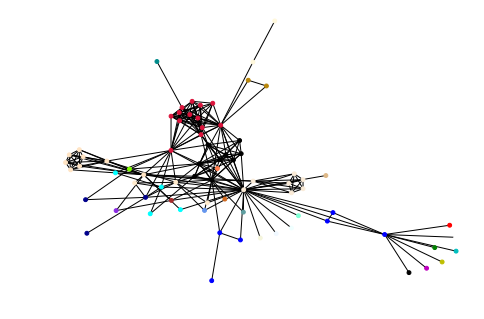

Number of communities: 32

Modularity: 0.9630895420369104


<h4>Spectral Clustering</h4>

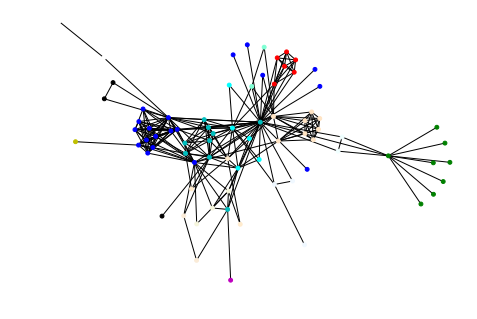

Number of communities: 18

Modularity: 0.948051948051948


<h4>Modularity Maximization</h4>

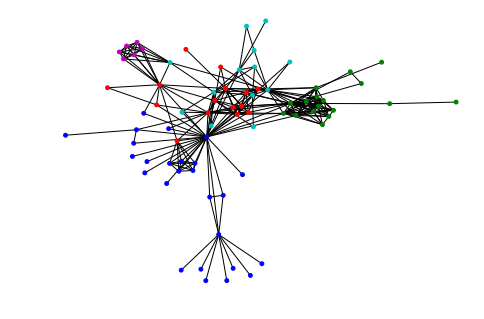

Number of communities: 5

Modularity: 0.815105946684894


In [147]:
visual_com(nlesmis,lesmis_GN,lesmis_GN_modularity,"Newman-Girvan")
visual_com(nlesmis,lesmis_SC,lesmis_SC_modularity,"Spectral Clustering")
visual_com(nlesmis,lesmis_MM,lesmis_MM_modularity,"Modularity Maximization")

<p>b. Οπτικοποίηση κοινοτήτων American College Football.</p>

<h4>Newman-Girvan</h4>

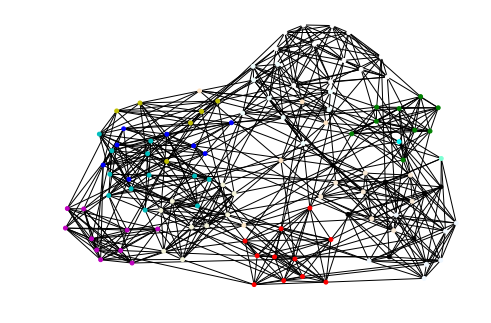

Number of communities: 17

Modularity: 0.9581998474446987


<h4>Spectral Clustering</h4>

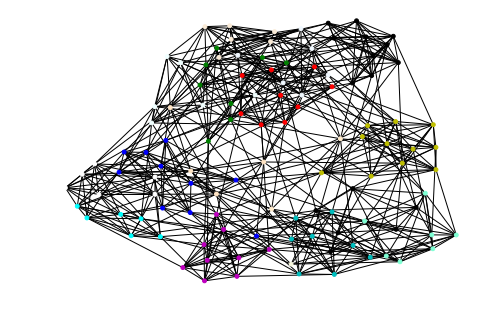

Number of communities: 18

Modularity: 0.9583524027459954


<h4>Modularity Maximization</h4>

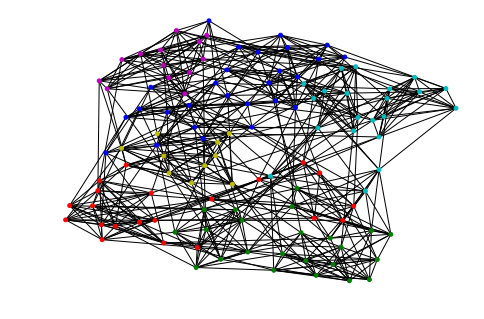

Number of communities: 6

Modularity: 0.8681922196796339


In [148]:
visual_com(nfootball,football_GN,football_GN_modularity,"Newman-Girvan")
visual_com(nfootball,football_SC,football_SC_modularity,"Spectral Clustering")
visual_com(nfootball,football_MM,football_MM_modularity,"Modularity Maximization")

<p>c. Οπτικοποίηση κοινοτήτων Dolphins.</p>

<h4>Newman-Girvan</h4>

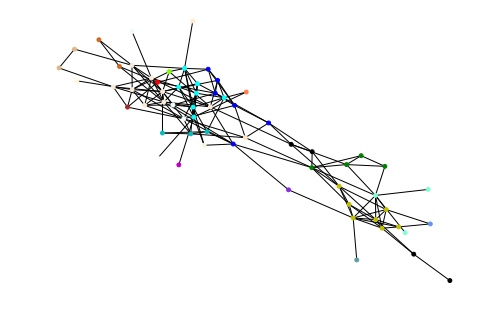

Number of communities: 27

Modularity: 0.9439450026441036


<h4>Spectral Clustering</h4>

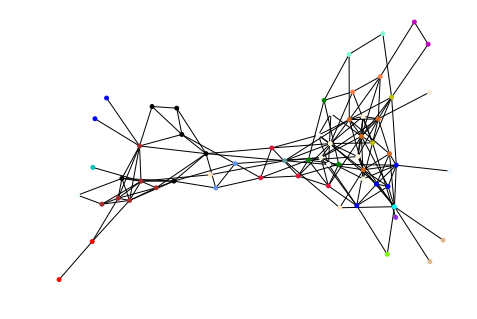

Number of communities: 28

Modularity: 0.9354838709677419


<h4>Modularity Maximization</h4>

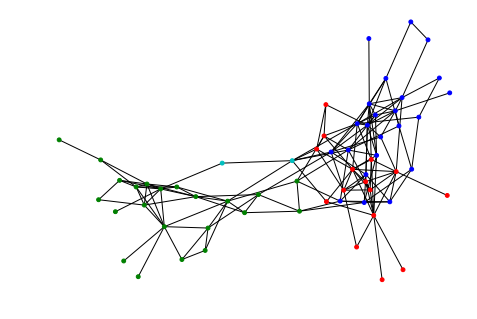

Number of communities: 4

Modularity: 0.7424643046007403


In [149]:
visual_com(ndolphins,dolphins_GN,dolphins_GN_modularity,"Newman-Girvan")
visual_com(ndolphins,dolphins_SC,dolphins_SC_modularity,"Spectral Clustering")
visual_com(ndolphins,dolphins_MM,dolphins_MM_modularity,"Modularity Maximization")

<p>d. Οπτικοποίηση κοινοτήτων REG.</p>

<h4>Newman-Girvan</h4>

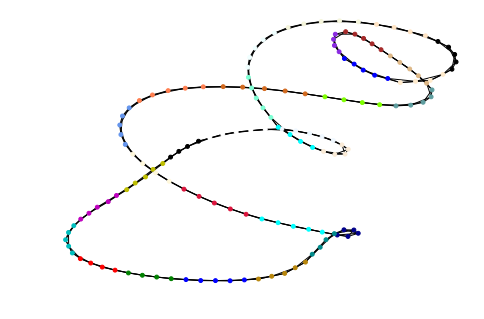

Number of communities: 32

Modularity: 0.9846085011185682


<h4>Spectral Clustering</h4>

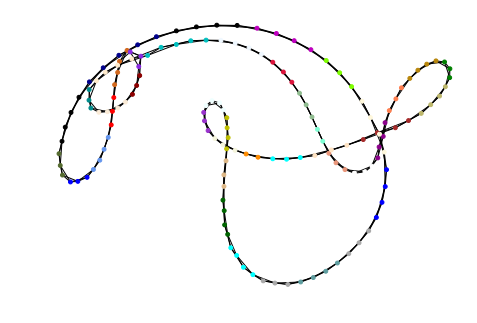

Number of communities: 43

Modularity: 0.9862192393736018


<h4>Modularity Maximization</h4>

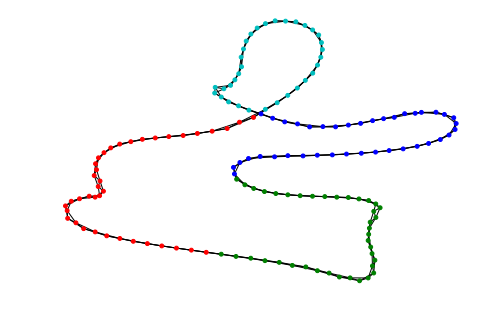

Number of communities: 4

Modularity: 0.7785234899328859


In [150]:
visual_com(REG,REG_GN,REG_GN_modularity,"Newman-Girvan")
visual_com(REG,REG_SC,REG_SC_modularity,"Spectral Clustering")
visual_com(REG,REG_MM,REG_MM_modularity,"Modularity Maximization")

<p>e. Οπτικοποίηση κοινοτήτων RGER.</p>

<h4>Newman-Girvan</h4>

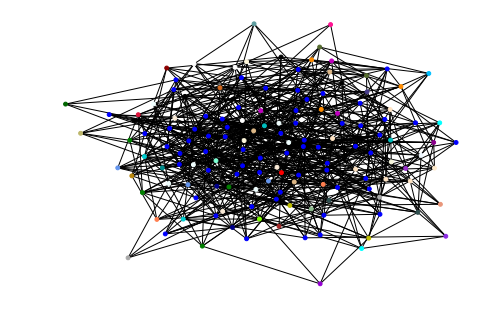

Number of communities: 50

Modularity: 0.807248322147651


<h4>Spectral Clustering</h4>

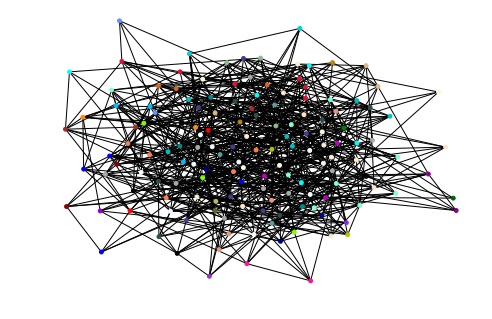

Number of communities: 50

Modularity: 0.9365548098434004


<h4>Modularity Maximization</h4>

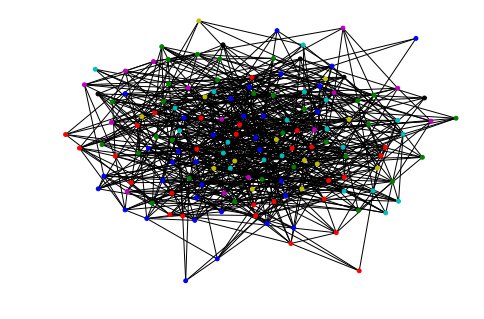

Number of communities: 7

Modularity: 0.8280984340044742


In [151]:
visual_com(RGER,RGER_GN,RGER_GN_modularity,"Newman-Girvan")
visual_com(RGER,RGER_SC,RGER_SC_modularity,"Spectral Clustering")
visual_com(RGER,RGER_MM,RGER_MM_modularity,"Modularity Maximization")

<p>f. Οπτικοποίηση κοινοτήτων RGG.</p>

<h4>Newman-Girvan</h4>

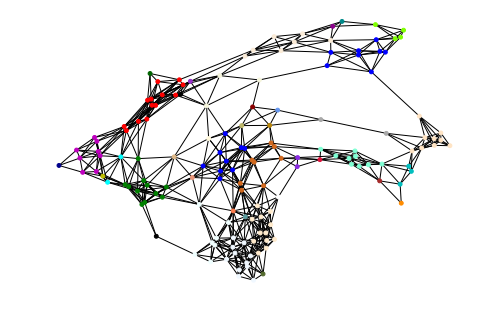

Number of communities: 42

Modularity: 0.9653691275167785


<h4>Spectral Clustering</h4>

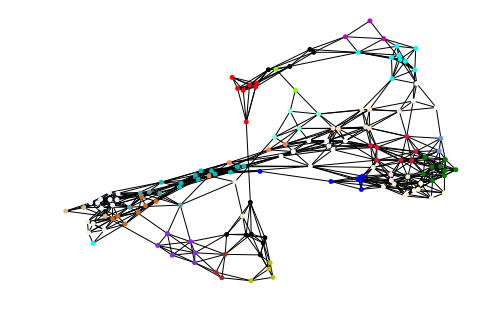

Number of communities: 29

Modularity: 0.9688590604026845


<h4>Modularity Maximization</h4>

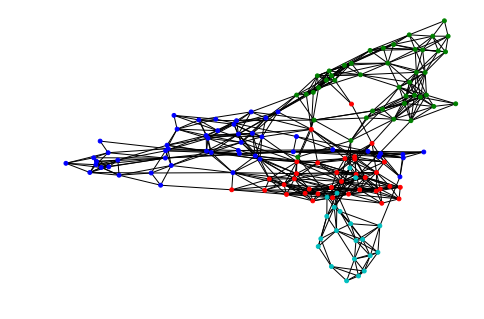

Number of communities: 4

Modularity: 0.7858612975391499


In [152]:
visual_com(RGG,RGG_GN,RGG_GN_modularity,"Newman-Girvan")
visual_com(RGG,RGG_SC,RGG_SC_modularity,"Spectral Clustering")
visual_com(RGG,RGG_MM,RGG_MM_modularity,"Modularity Maximization")

<p>g. Οπτικοποίηση κοινοτήτων SW.</p>

<h4>Newman-Girvan</h4>

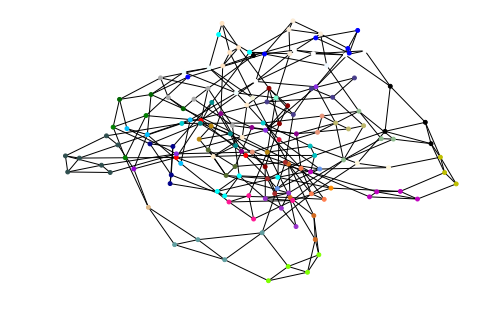

Number of communities: 50

Modularity: 0.9829977628635347


<h4>Spectral Clustering</h4>

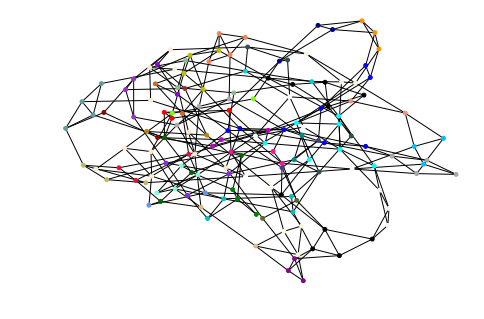

Number of communities: 50

Modularity: 0.9834451901565996


<h4>Modularity Maximization</h4>

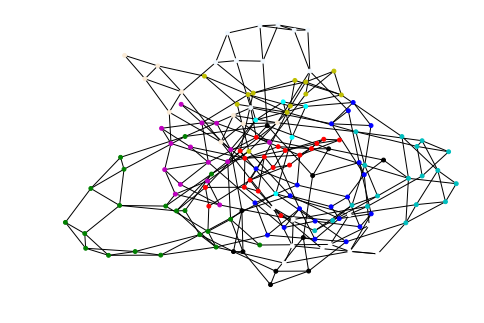

Number of communities: 11

Modularity: 0.9169574944071588


In [153]:
visual_com(SW,SW_GN,SW_GN_modularity,"Newman-Girvan")
visual_com(SW,SW_SC,SW_SC_modularity,"Spectral Clustering")
visual_com(SW,SW_MM,SW_MM_modularity,"Modularity Maximization")

<p>h. Οπτικοποίηση κοινοτήτων SF.</p>

<h4>Newman-Girvan</h4>

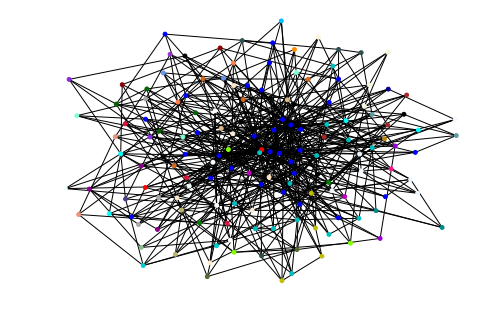

Number of communities: 50

Modularity: 0.9261744966442953


<h4>Spectral Clustering</h4>

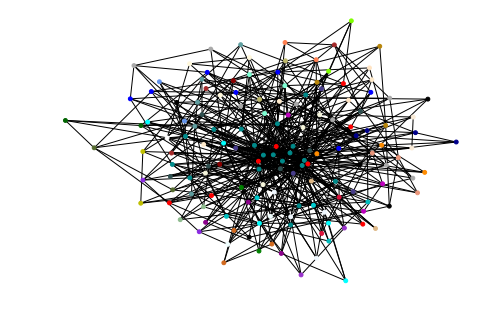

Number of communities: 47

Modularity: 0.9445190156599552


<h4>Modularity Maximization</h4>

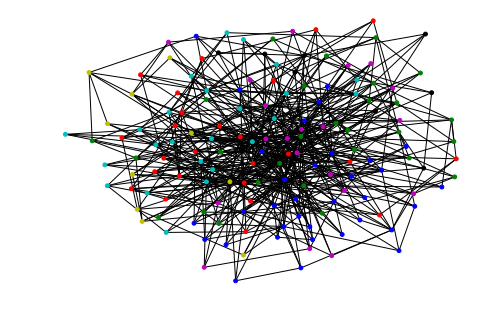

Number of communities: 7

Modularity: 0.8369574944071588


In [154]:
visual_com(SF,SF_GN,SF_GN_modularity,"Newman-Girvan")
visual_com(SF,SF_SC,SF_SC_modularity,"Spectral Clustering")
visual_com(SF,SF_MM,SF_MM_modularity,"Modularity Maximization")

#### Σχολιασμός

Συνήθως ο αλγόριθμος Newman-Girvan έχει το καλύτερο performance (modularity), ωστόσο είναι αργός, εφόσον υπολογίζει το betweenness centrality όλων των ακμών, κάθε φορά που αφαιρείται μία ακμή. Ο αλγόριθμος Spectral Clustering είναι γρηγορότερος από τον Newman-Girvan με τη διαφορά ότι υπολογίζει τα ιδιοδιανύσματα του πίνακα Laplace του δικτύου, με εξίσου καλό performance (modularity). Ο αλγόριθμος Modularity Maximization έχει μικρότερο performance σε σχέση με τους άλλους δύο αλγορίθμους, και είναι και ο πιο γρήγορος από όλους. Ο REG γράφος κατανέμεται σε ομάδες διαδοχικών κόμβων. Ο RGER γράφος έχει πολύ μεγάλο αριθμό ακμών, δυσκολεύοντας την διαδικασία του clustering. Στον RGG γράφο οι ομάδες χωρίζονται τοπικά, ανάλογα με την τοποθεσία τους στον γράφο. Ο SW γράφος έχει μεγάλο αριθμό ακμών, δυσκολεύντας την αναγνώριση των ομάδων οπτικά. Ο SF γράφος έχει κοινότητες που συγκεντρώνονται γύρω από βασικούς κόμβους, και άλλες που έχουν γειτονικούς -όχι τόσο βασικούς- κόμβους, οι οποίοι έχουν και μεγάλο συντελεστή ομαδοποίησης (clustering coefficient).